# **PREPARE DATASET**

In [18]:
# import library yang diperlukan
# membaca TSV TXT file menggunakan pandas
import pandas as pd
import re
import sklearn
import nltk

nltk.download('stopwords')

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
df = pd.read_csv('train_preprocess.tsv.txt', delimiter = "\t", names = ['text','label'])

In [20]:
df.shape

(11000, 2)

In [21]:
label=df.label.value_counts()
label

label
positive    6416
negative    3436
neutral     1148
Name: count, dtype: int64

In [22]:
df

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


# **TEXT NORMALIZATION**

**Regex Cleaning**

In [23]:
def cleaning(text):
  # membuat tulisan lower case
  text = text.lower()
  # menghilangkan whitespaces didepan & belakang
  text = text.strip()

  # menghilangkan USER tag    
  text = re.sub('user', ' ', text)
  # menghilangkan URL tag    
  text = re.sub('url', ' ', text)
  # menghilangkan "RT" tag    
  text = re.sub('rt', ' ', text)
  # menghilangkan random url
  text = re.sub(r'https?:[^\s]+', '', text)      
                    
  # menghilangkan tab
  text = re.sub('\t', ' ', text)
  #  menghilangkan random /xf character
  text = re.sub('x[a-z0-9]{2}', ' ', text)
  #  menghilangkan code "newline"  
  text =  text.replace('\\n', ' ')
  # menghilangkan symbol tersisa    
  text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
  text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "  ", text)
  # menghilangkan sisa whitespaces
  text = re.sub(r' \s+', ' ',text)
  # menghilangkan whitespaces kembali
  text = text.strip()


  return text

In [24]:
df['text_clean'] = df.text.apply(cleaning)
df

,text,label,text_clean
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus dan k mmbri hujjah pa ai apa...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis di jalan sumatera bandung tem...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya diri ini saat unbo g paket ...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh jadi mahasiswa jangan sombong dong kasih k...
...,...,...,...
10995,tidak kecewa,positive,tidak kecewa
10996,enak rasa masakan nya apalagi kepiting yang me...,positive,enak rasa masakan nya apalagi kepiting yang me...
10997,hormati partai-partai yang telah berkoalisi,neutral,hormati pa ai pa ai yang telah berkoalisi
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative,pagi pagi di tol pasteur sudah macet parah bik...


**Stemming**

In [25]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [26]:
# fungsi stemming
def stemming(text):
  text = stemmer.stem(text)
  return text

In [27]:
# df['text_clean'] = df.text_clean.apply(stemming)
# df

In [28]:
df.to_csv('stemmed', index=False)
df = pd.read_csv('stemmed.csv')

In [29]:
df

,text,label,text_clean
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus dan k mmbri hujjah pa ai apa...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis di jalan sumatera bandung tem...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya diri ini saat unbo g paket ...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh jadi mahasiswa jangan sombong dong kasih k...
...,...,...,...
10995,tidak kecewa,positive,tidak kecewa
10996,enak rasa masakan nya apalagi kepiting yang me...,positive,enak rasa masakan nya apalagi kepiting yang me...
10997,hormati partai-partai yang telah berkoalisi,neutral,hormati pa ai pa ai yang telah berkoalisi
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative,pagi pagi di tol pasteur sudah macet parah bik...


In [30]:
# fungsi multiple cleansing
def cleansing(text):
    text = cleaning(text)
    text = stemming(text)

    return text

**Stop Words**

normalisasi dengan menghilangkan stop words menjadikan akurasi validasi lebih rendah secara umum 84 -> 77

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
indonesia_s = stopwords.words('indonesian')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\muham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
def stopwording(text):
  new_text = word_tokenize(text)

  words = [word for word in new_text
    if word.lower() not in indonesia_s]

  new_words = ' '.join(words)
  return new_words

In [33]:
df['stopwords'] = df.text_clean.apply(stopwording)
df.to_csv('stopped.csv', index=False)
df = pd.read_csv('stopped.csv')

# **NEURAL NETWORK**

# **Feature Extraction**

**Bag of Words**

bag of word saya pakai karna memberikan prediksi yang lebih baik pada prediksi sentimen

In [34]:
df = pd.read_csv('stemmed.csv')

In [35]:
data_preprocessed = df.text_clean.tolist()

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
count_vect = CountVectorizer()
count_vect.fit(data_preprocessed)

X = count_vect.transform(data_preprocessed)
print('data exctraction is done')

data exctraction is done


In [38]:
import pickle

pickle.dump(count_vect, open('feature.p', 'wb'))

**TF-IDF**

In [39]:
# from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
# tfidf_vect = TfidfVectorizer()
# tfidf_vect.fit(data_preprocessed)

# XT = tfidf_vect.transform(data_preprocessed)
# print('data extraction is done')

# XT

# **Splitting Dataset**

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
classes = df.label
classes

0        positive
1         neutral
2        positive
3        positive
4        negative
           ...   
10995    positive
10996    positive
10997     neutral
10998    negative
10999    positive
Name: label, Length: 11000, dtype: object

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, classes, test_size=0.2)

## **Training**

**Neural Network**

In [44]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(activation='logistic')
model.fit(X_train,y_train)

print('training is done')

training is done


In [45]:
import pickle
pickle.dump(model, open('model-sentiment.p', 'wb'))

## **EVALUATION**

**Classification report**

In [46]:
from sklearn.metrics import classification_report

test = model.predict(X_test)

print('testing is done')
print(classification_report(y_test, test))

testing is done
              precision    recall  f1-score   support

    negative       0.74      0.76      0.75       702
     neutral       0.77      0.65      0.70       229
    positive       0.86      0.87      0.86      1269

    accuracy                           0.81      2200
   macro avg       0.79      0.76      0.77      2200
weighted avg       0.81      0.81      0.81      2200



**Cross Validation**

In [47]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5,random_state=42,shuffle=True)

accuracies = []

y = classes

for iteration, data in enumerate(kf.split(X), start=1):

    data_train    = X[data[0]]
    target_train  = y[data[0]]

    data_test     = X[data[1]]
    target_test   = y[data[1]]

    clf = MLPClassifier(activation='logistic')
    clf.fit(data_train,target_train)

    preds = clf.predict(data_test)

    accuracy = accuracy_score(target_test,preds)

    print('Training ke - ', iteration)
    print(classification_report(target_test,preds))
    print('=====================')

    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)

print()
print()
print()
print('Rata-rata Accuracy:', average_accuracy)

c:\Users\muham\OneDrive\Documents\Binar_data_science\Platinum_chalange\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Training ke -  1
              precision    recall  f1-score   support

    negative       0.73      0.75      0.74       680
     neutral       0.76      0.64      0.69       239
    positive       0.85      0.86      0.86      1281

    accuracy                           0.81      2200
   macro avg       0.78      0.75      0.76      2200
weighted avg       0.81      0.81      0.80      2200

Training ke -  2
              precision    recall  f1-score   support

    negative       0.73      0.71      0.72       706
     neutral       0.69      0.66      0.68       220
    positive       0.85      0.87      0.86      1274

    accuracy                           0.80      2200
   macro avg       0.76      0.75      0.75      2200
weighted avg       0.80      0.80      0.80      2200

Training ke -  3
              precision    recall  f1-score   support

    negative       0.75      0.74      0.74       682
     neutral       0.83      0.68      0.75       215
    positive       0.85 

## **NN Prediction**

In [ ]:
# original_text = 'mantap sekali rasa syukur dan rasa cukup.'
original_text = 'suka makan orang'

# Feature Extraction
text = count_vect.transform([cleansing(original_text)])

# Prediksi Sentimenya
result = model.predict(text)[0]
print('Text sentiment analysis:')
print()
print(result)

Sentiment:

negative


# **LSTM**

**Data Preparation**

In [ ]:
df = pd.read_csv('stemmed.csv')
df.shape

(11000, 4)

In [ ]:
df.head()

,Unnamed: 0,text,label,text_clean
0,0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung ini milik oleh usaha pabrik tahu yang s...
1,1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus dan k mmbri hujjah partai ap...
2,2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis di jalan sumatera bandung tem...
3,3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya diri ini saat unboxing pake...
4,4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh jadi mahasiswa jangan sombong dong kasih k...


In [ ]:
neg = df.loc[df['label'] == 'negative'].text_clean.tolist()
neu = df.loc[df['label'] == 'neutral'].text_clean.tolist()
pos = df.loc[df['label'] == 'positive'].text_clean.tolist()

neg_label = df.loc[df['label'] == 'negative'].label.tolist()
neu_label = df.loc[df['label'] == 'neutral'].label.tolist()
pos_label = df.loc[df['label'] == 'positive'].label.tolist()


In [ ]:
total_data = pos + neu + neg
labels = pos_label + neu_label + neg_label

print ('Positive: %s, Neutral: %s, Negative: %s' % (len(pos), len(neu), len(neg)))
print ('Total data: %s' % len(total_data))

Positive: 6416, Neutral: 1148, Negative: 3436
Total data: 11000


**LSTM Tokenization Feature Extraction**

In [ ]:
import pickle
import setuptools.dist
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import defaultdict

max_features = 100000
tokenizer = Tokenizer(num_words=max_features, split=' ', lower=True)
tokenizer.fit_on_texts(total_data)
with open('tokenizer.pickle', 'wb') as handle:
  pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
  print('tokenizier.pickle has created!')

X = tokenizer.texts_to_sequences(total_data)

vocab_size = len(tokenizer.word_index)
maxlen = max(len(x) for x in X)

X = pad_sequences(X)
with open('x_pad_sequences.pickle', 'wb') as handle:
    pickle.dump(X, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print('x_pad_sequences.pickle has been created!')

tokenizier.pickle has created!
x_pad_sequences.pickle has been created!


In [ ]:
Y = pd.get_dummies(labels)
Y

,negative,neutral,positive
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
10995,True,False,False
10996,True,False,False
10997,True,False,False
10998,True,False,False


In [ ]:
Y = Y.values

with open('y_labels.pickle', 'wb') as handle:
      pickle.dump(Y, handle, protocol=pickle.HIGHEST_PROTOCOL)
      print('y_labels.pickle has been created!')


y_labels.pickle has been created!


In [ ]:
from sklearn.model_selection import train_test_split

file = open("x_pad_sequences.pickle", 'rb')
X = pickle.load(file)
file.close()

file = open("y_labels.pickle", 'rb')
Y = pickle.load(file)
file.close()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)



**Training**

In [ ]:
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K

**1st Training**

In [ ]:
embed_dim = 100
units = 64

modelL = Sequential()
modelL.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
modelL.add(LSTM(units, dropout=0.2))
modelL.add(Dense(3, activation='softmax'))

modelL.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(modelL.summary())

adam = optimizers.Adam(learning_rate=0.001)
modelL.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = modelL.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), verbose=1, callbacks=[es])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 76s 84ms/step - accuracy: 0.7408 - loss: 0.5984 - val_accuracy: 0.8709 - val_loss: 0.3420
Epoch 2/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 73s 83ms/step - accuracy: 0.9222 - loss: 0.2119 - val_accuracy: 0.8759 - val_loss: 0.3459
Epoch 2: early stopping


**2nd Training trial**

In [ ]:
embed_dim = 100
units = 64

modelL = Sequential()
modelL.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
modelL.add(LSTM(units, dropout=0.5))
modelL.add(Dense(3, activation='softmax'))

modelL.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(modelL.summary())

adam = optimizers.Adam(learning_rate=0.001)
modelL.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)
history = modelL.fit(X_train, y_train, epochs=12, batch_size=15, validation_data=(X_test, y_test), verbose=1, callbacks=[es])

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.7385 - loss: 0.6276 - val_accuracy: 0.8705 - val_loss: 0.3564
Epoch 2/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 52s 88ms/step - accuracy: 0.9125 - loss: 0.2457 - val_accuracy: 0.8755 - val_loss: 0.3322
Epoch 3/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 52s 88ms/step - accuracy: 0.9474 - loss: 0.1586 - val_accuracy: 0.8782 - val_loss: 0.3649
Epoch 4/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 50s 86ms/step - accuracy: 0.9505 - loss: 0.1227 - val_accuracy: 0.8709 - val_loss: 0.3828
Epoch 5/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 52s 88ms/step - accuracy: 0.9650 - loss: 0.0923 - val_accuracy: 0.8732 - val_loss: 0.4187
Epoch 6/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 50s 85ms/step - accuracy: 0.9723 - loss: 0.0706 - val_accuracy: 0.8736 - val_loss: 0.4739
Epoch 7/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 50s 85ms/step - accuracy: 0.9775 - loss: 0.0654 - val_accuracy: 0.8714 - val_loss: 0.4545
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 2.


In [ ]:
embed_dim = 100
units = 428

modelL = Sequential()
modelL.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
modelL.add(LSTM(units, dropout=0.5))
modelL.add(Dense(3, activation='softmax'))

modelL.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(modelL.summary())

adam = optimizers.Adam(learning_rate=0.001)
modelL.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4, restore_best_weights=True)
history = modelL.fit(X_train, y_train, epochs=12, batch_size=15, validation_data=(X_test, y_test), verbose=1, callbacks=[es])

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 123s 204ms/step - accuracy: 0.7251 - loss: 0.6713 - val_accuracy: 0.8559 - val_loss: 0.4098
Epoch 2/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 126s 215ms/step - accuracy: 0.8976 - loss: 0.2854 - val_accuracy: 0.8700 - val_loss: 0.3499
Epoch 3/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 119s 202ms/step - accuracy: 0.9289 - loss: 0.1853 - val_accuracy: 0.8823 - val_loss: 0.3590
Epoch 4/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 119s 202ms/step - accuracy: 0.9615 - loss: 0.1108 - val_accuracy: 0.8923 - val_loss: 0.3387
Epoch 5/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 118s 200ms/step - accuracy: 0.9752 - loss: 0.0828 - val_accuracy: 0.8905 - val_loss: 0.3978
Epoch 6/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 124s 212ms/step - accuracy: 0.9789 - loss: 0.0639 - val_accuracy: 0.8950 - val_loss: 0.4333
Epoch 7/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 125s 213ms/step - accuracy: 0.9848 - loss: 0.0542 - val_accuracy: 0.8905 - val_loss: 0.4400
Epoch 8/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 124s 211ms/step - accuracy: 0.9

**3rd Training Trial**

In [ ]:
embed_dim = 100
units = 428

modelL = Sequential()
modelL.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
modelL.add(LSTM(units, dropout=0.5))
modelL.add(Dense(3, activation='softmax'))

modelL.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(modelL.summary())

adam = optimizers.Adam(learning_rate=0.001)
modelL.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4, restore_best_weights=True)
history = modelL.fit(X_train, y_train, epochs=12, batch_size=15, validation_data=(X_test, y_test), verbose=1, callbacks=[es])

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_26 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_26 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 130s 216ms/step - accuracy: 0.7148 - loss: 0.6966 - val_accuracy: 0.8577 - val_loss: 0.3832
Epoch 2/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 114s 194ms/step - accuracy: 0.8894 - loss: 0.3006 - val_accuracy: 0.8732 - val_loss: 0.3582
Epoch 3/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 110s 187ms/step - accuracy: 0.9381 - loss: 0.1714 - val_accuracy: 0.8927 - val_loss: 0.3342
Epoch 4/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 110s 186ms/step - accuracy: 0.9605 - loss: 0.1187 - val_accuracy: 0.8859 - val_loss: 0.3933
Epoch 5/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 109s 186ms/step - accuracy: 0.9690 - loss: 0.0939 - val_accuracy: 0.8900 - val_loss: 0.4085
Epoch 6/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 117s 199ms/step - accuracy: 0.9755 - loss: 0.0766 - val_accuracy: 0.8845 - val_loss: 0.4242
Epoch 7/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 121s 206ms/step - accuracy: 0.9847 - loss: 0.0522 - val_accuracy: 0.8900 - val_loss: 0.4420
Epoch 7: early stopping
Restoring model weights from the end of the bes

**GridSearchCV optimization tuner**

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

In [ ]:
# from tensorflow import keras
# from kerastuner.tuners import BayesianOptimization

# def build_model(hp):
#     embed_dim = 100

#     model = Sequential()
#     model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
#     model.add(LSTM(units=hp.Int('units',min_value=32,
#                                     max_value=512,
#                                     step=32), 
#                                 ))
    
#     model.add(Dense(3))
#     model.compile(loss='mae', metrics=['mae'], optimizer=keras.optimizers.Adam(
#         hp.Choice('learning_rate',
#                   values=[1e-2, 1e-3, 1e-4])))

#     return model

# bayesian_opt_tuner = BayesianOptimization(
#     build_model,
#     objective='mae',
#     max_trials=20,
#     executions_per_trial=1,
#     project_name='kerastuner_bayesian_poc',
#     overwrite=True)

# bayesian_opt_tuner.search(X_train, y_train,epochs=15,
#      validation_data=(X_test, y_test),
#      validation_split=0.2,verbose=1)


# bayes_opt_model_best_model = bayesian_opt_tuner.get_best_models(num_models=1)
# model = bayes_opt_model_best_model[0]

# **Evaluation**

**Classification_report**

In [ ]:
from sklearn import metrics

predictions = modelL.predict(X_test)
y_pred = predictions
matrix_test = metrics.classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))

print('testing is done')
print(matrix_test)

69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step
testing is done
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       685
           1       0.84      0.76      0.80       233
           2       0.93      0.92      0.93      1282

    accuracy                           0.89      2200
   macro avg       0.87      0.86      0.86      2200
weighted avg       0.89      0.89      0.89      2200



**Cross-Validation**

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5,random_state=42,shuffle=True)

accuracies = []

y = Y

embed_dim = 100
units = 428

for iteration, data in enumerate(kf.split(X), start=1):

    data_train    = X[data[0]]
    target_train  = y[data[0]]

    data_test     = X[data[1]]
    target_test   = y[data[1]]

    modelL = Sequential()
    modelL.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
    modelL.add(LSTM(units, dropout=0.5))
    modelL.add(Dense(3, activation='softmax'))

    modelL.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    print(modelL.summary())

    adam = optimizers.Adam(learning_rate=0.001)
    modelL.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3, restore_best_weights=True)
    history = modelL.fit(X_train, y_train, epochs=12, batch_size=15, validation_data=(X_test, y_test), verbose=1, callbacks=[es])

    predictions = modelL.predict(X_test)
    y_pred = predictions

    accuracy = accuracy_score(y_test.argmax(axis=1),y_pred.argmax(axis=1))

    print('Training ke - ', iteration)
    print(classification_report(y_test.argmax(axis=1),y_pred.argmax(axis=1)))
    print('=====================')

    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)

print()
print()
print()
print('Rata-rata Accuracy:', average_accuracy)

c:\Users\Josh\binar-data-science\binar-data-science\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_31 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_31 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 129s 215ms/step - accuracy: 0.7106 - loss: 0.6834 - val_accuracy: 0.8391 - val_loss: 0.4349
Epoch 2/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 125s 212ms/step - accuracy: 0.8959 - loss: 0.2763 - val_accuracy: 0.8768 - val_loss: 0.3466
Epoch 3/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 125s 213ms/step - accuracy: 0.9357 - loss: 0.1843 - val_accuracy: 0.8818 - val_loss: 0.3819
Epoch 4/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 124s 212ms/step - accuracy: 0.9581 - loss: 0.1242 - val_accuracy: 0.8768 - val_loss: 0.3993
Epoch 5/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 124s 211ms/step - accuracy: 0.9715 - loss: 0.0919 - val_accuracy: 0.8886 - val_loss: 0.3936
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step
Training ke -  1
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       685
           1       0.82      0.76      0.79       233
           2       0.94      0.8

c:\Users\Josh\binar-data-science\binar-data-science\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_32 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_32 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 127s 211ms/step - accuracy: 0.7113 - loss: 0.6794 - val_accuracy: 0.8600 - val_loss: 0.3841
Epoch 2/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 124s 212ms/step - accuracy: 0.8906 - loss: 0.2960 - val_accuracy: 0.8782 - val_loss: 0.3382
Epoch 3/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 123s 210ms/step - accuracy: 0.9336 - loss: 0.1921 - val_accuracy: 0.8764 - val_loss: 0.3539
Epoch 4/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 123s 209ms/step - accuracy: 0.9507 - loss: 0.1436 - val_accuracy: 0.8864 - val_loss: 0.3751
Epoch 5/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 123s 209ms/step - accuracy: 0.9743 - loss: 0.0845 - val_accuracy: 0.8791 - val_loss: 0.4229
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step
Training ke -  2
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       685
           1       0.85      0.71      0.77       233
           2       0.91      0.9

c:\Users\Josh\binar-data-science\binar-data-science\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_33 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_33 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 124s 207ms/step - accuracy: 0.6949 - loss: 0.7205 - val_accuracy: 0.8423 - val_loss: 0.4038
Epoch 2/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 120s 205ms/step - accuracy: 0.8919 - loss: 0.2915 - val_accuracy: 0.8736 - val_loss: 0.3443
Epoch 3/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 121s 206ms/step - accuracy: 0.9300 - loss: 0.1870 - val_accuracy: 0.8745 - val_loss: 0.3920
Epoch 4/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 121s 206ms/step - accuracy: 0.9527 - loss: 0.1399 - val_accuracy: 0.8900 - val_loss: 0.3825
Epoch 5/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 121s 206ms/step - accuracy: 0.9685 - loss: 0.1005 - val_accuracy: 0.8914 - val_loss: 0.3585
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step
Training ke -  3
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       685
           1       0.86      0.74      0.80       233
           2       0.90      0.9

c:\Users\Josh\binar-data-science\binar-data-science\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_34 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_34 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 125s 208ms/step - accuracy: 0.7410 - loss: 0.6323 - val_accuracy: 0.8555 - val_loss: 0.3751
Epoch 2/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 120s 204ms/step - accuracy: 0.9001 - loss: 0.2868 - val_accuracy: 0.8814 - val_loss: 0.3352
Epoch 3/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 120s 204ms/step - accuracy: 0.9364 - loss: 0.1743 - val_accuracy: 0.8923 - val_loss: 0.3455
Epoch 4/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 122s 208ms/step - accuracy: 0.9587 - loss: 0.1289 - val_accuracy: 0.8955 - val_loss: 0.3934
Epoch 5/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 123s 209ms/step - accuracy: 0.9725 - loss: 0.0911 - val_accuracy: 0.8882 - val_loss: 0.3878
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step
Training ke -  4
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       685
           1       0.83      0.76      0.79       233
           2       0.92      0.9

c:\Users\Josh\binar-data-science\binar-data-science\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_35 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_35 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 137s 226ms/step - accuracy: 0.7171 - loss: 0.6618 - val_accuracy: 0.8577 - val_loss: 0.4247
Epoch 2/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 126s 215ms/step - accuracy: 0.9021 - loss: 0.2786 - val_accuracy: 0.8745 - val_loss: 0.3328
Epoch 3/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 130s 222ms/step - accuracy: 0.9390 - loss: 0.1706 - val_accuracy: 0.8877 - val_loss: 0.3314
Epoch 4/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 128s 218ms/step - accuracy: 0.9608 - loss: 0.1200 - val_accuracy: 0.8755 - val_loss: 0.3761
Epoch 5/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 132s 224ms/step - accuracy: 0.9693 - loss: 0.0949 - val_accuracy: 0.8777 - val_loss: 0.4417
Epoch 6/12
587/587 ━━━━━━━━━━━━━━━━━━━━ 126s 214ms/step - accuracy: 0.9803 - loss: 0.0552 - val_accuracy: 0.8827 - val_loss: 0.4794
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step
Training ke -  5
              precision    recall  f1-score   support

        

# **Training Visualization**

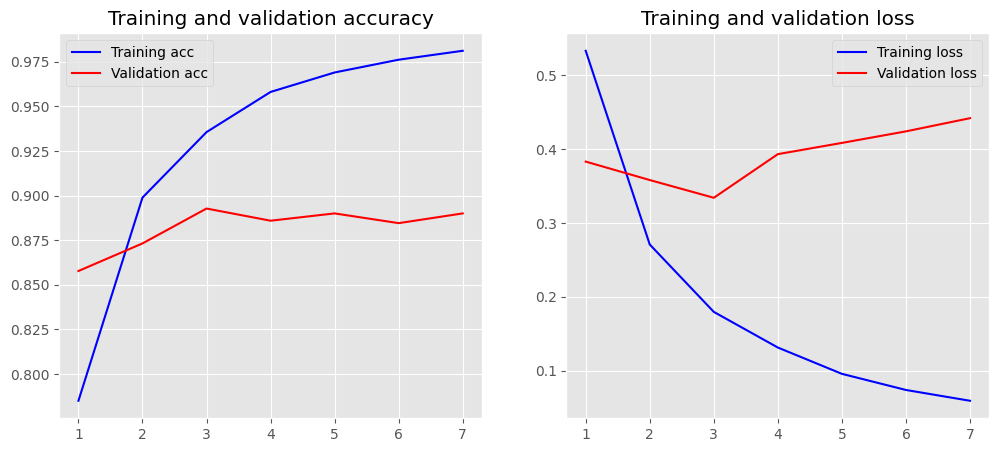

In [ ]:
from ast import increment_lineno
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  x = range(1, len(acc) + 1)

  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  plt.plot(x, acc, 'b', label='Training acc')
  plt.plot(x, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(x, loss,'b', label= 'Training loss')
  plt.plot(x, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

%matplotlib inline
plot_history(history)


# **Saving model**

In [ ]:
modelL.save('modelLSTM.h5')
print('Model has been created!')

Model has been created!


# **Prediction**

In [ ]:
from keras.models import load_model

input_text = ' - disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !'

sentiment = ['negative', 'neutral', 'positive']

text = [cleansing(input_text)]
predicted = tokenizer.texts_to_sequences(text)
guess = pad_sequences(predicted, maxlen=X.shape[1])

model = load_model('modelLSTM.h5')
prediction = model.predict(guess)
polarity = np.argmax(prediction[0])

print('Text: ', text[0])
print('Sentiment: ', sentiment[polarity])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Text:  saat semua cowok usaha lacak perhati gue loe lantas remeh perhati yg gue kasih khusus ke elo basic elo cowok bego
Sentiment:  negative


In [ ]:
from keras.models import load_model

input_text = 'USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah'

sentiment = ['negative', 'neutral', 'positive']

text = [cleansing(input_text)]
predicted = tokenizer.texts_to_sequences(text)
guess = pad_sequences(predicted, maxlen=X.shape[1])

model = load_model('modelLSTM.h5')
prediction = model.predict(guess)
polarity = np.argmax(prediction[0])

print('Text: ', text[0])
print('Sentiment: ', sentiment[polarity])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
Text:  kaum cebong kapir udah liat dongok dari awal tambah dongok lagi hahahah
Sentiment:  negative


# **Visualization**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

**Exploratory Data Analysis**

In [ ]:
V_df = df['label'].value_counts().rename_axis('label_values').reset_index(name='counts')
V_df

label_value = V_df.label_values
count_value = V_df.counts

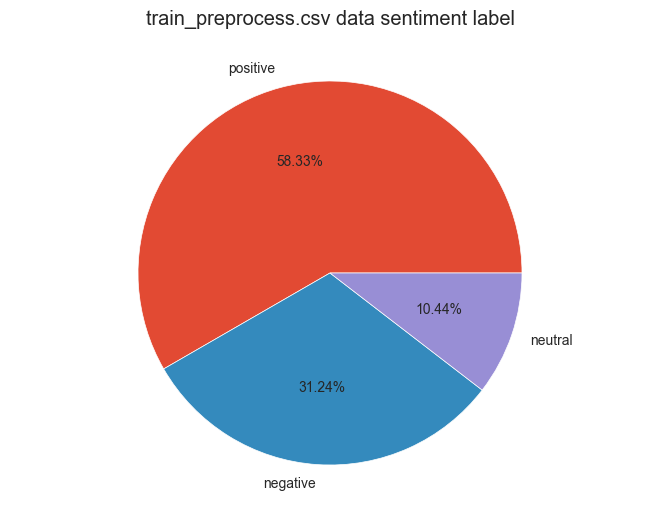

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(count_value, labels = label_value, autopct='%1.2f%%')
plt.title('train_preprocess.csv data sentiment label')
plt.show()

WordCloud

In [ ]:
from wordcloud import WordCloud

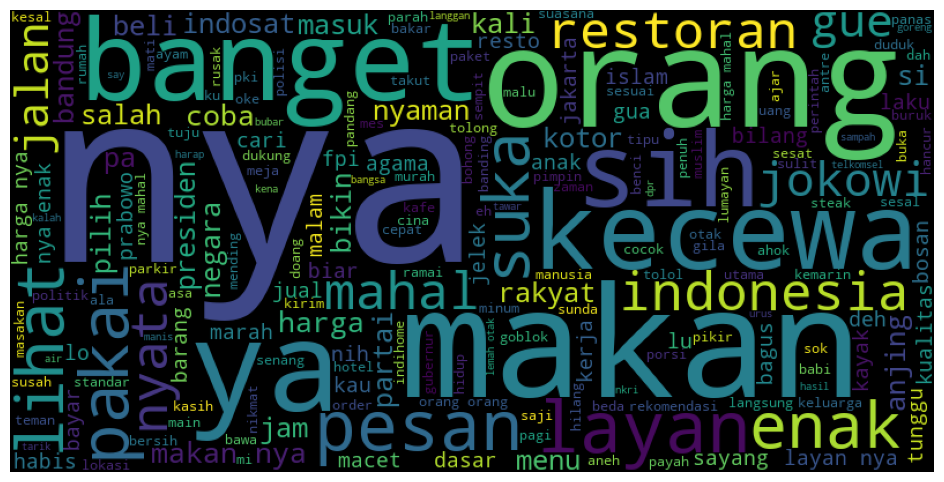

In [ ]:
label_negative = df.loc[df['label'] == 'negative']
text = ' '.join(label_negative['stopwords'])

wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

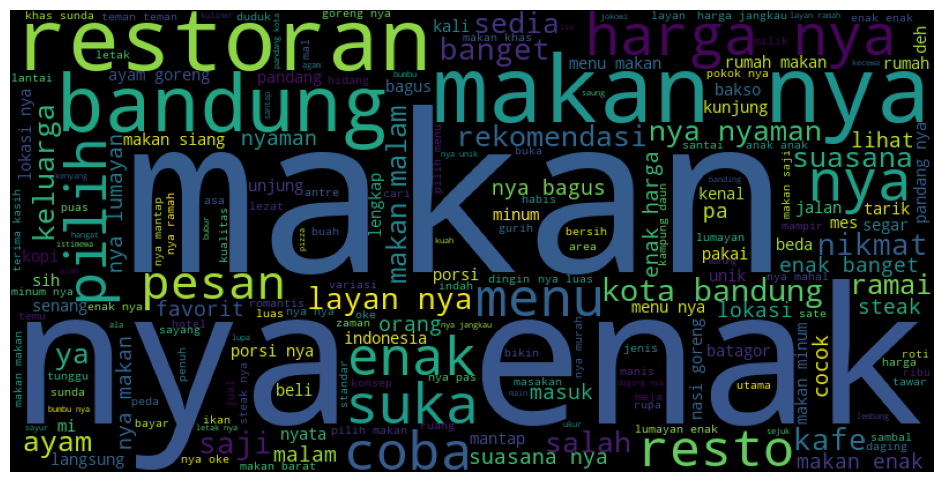

In [ ]:
label_positive = df.loc[df['label'] == 'positive']
text = ' '.join(label_positive['stopwords'])

wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

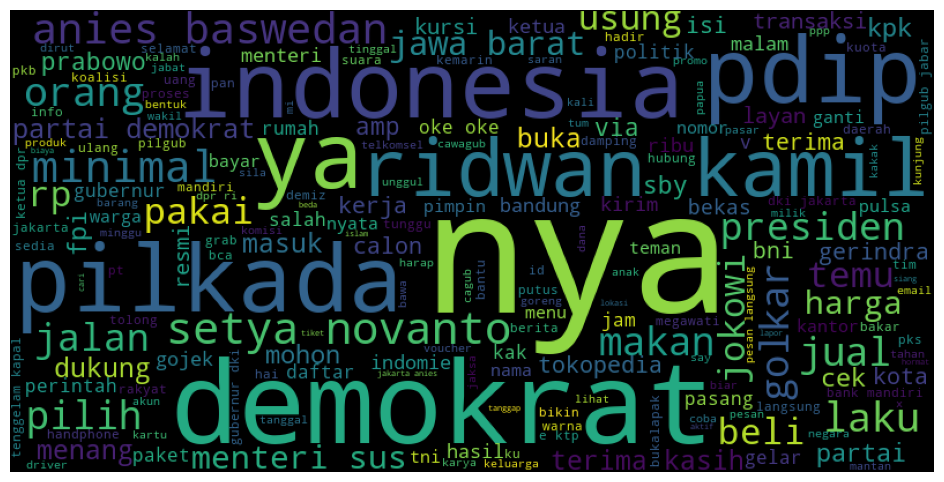

In [ ]:
label_neutral = df.loc[df['label'] == 'neutral']
text = ' '.join(label_neutral['stopwords'])

wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**LSTM Confusion Matrix**

In [ ]:
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)

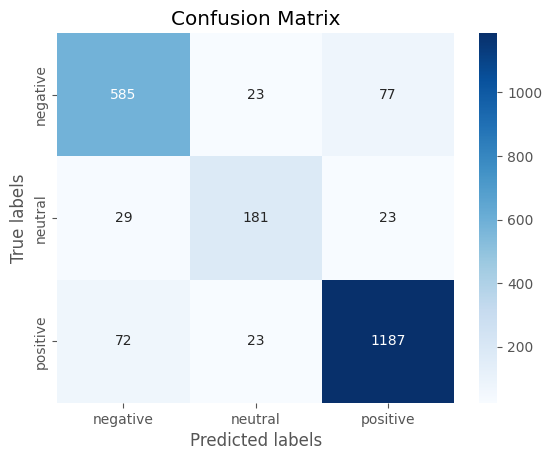

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()